In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text

data = pd.read_excel('/Users/mac/Desktop/академэссе/pool_old.xlsx', index_col=0)
data

,pools,old
region,,
Белгородская область,156,325.2
Брянская область,56,345.5
Владимирская область,71,323.3
Воронежская область,72,310.4
Ивановская область,38,328.6
...,...,...
Амурская область,18,282.4
Магаданская область,10,308.7
Сахалинская область,27,342.4


In [2]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

scaled_data

,pools,old
region,,
Белгородская область,0.834154,0.617156
Брянская область,-0.266065,1.103807
Владимирская область,-0.101032,0.571608
Воронежская область,-0.090030,0.262357
Ивановская область,-0.464105,0.698664
...,...,...
Амурская область,-0.684148,-0.408884
Магаданская область,-0.772166,0.221603
Сахалинская область,-0.585129,1.029491


/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_22006/2912559509.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.annotate(txt, (scaled_data['pools'][i], scaled_data['old'][i])))


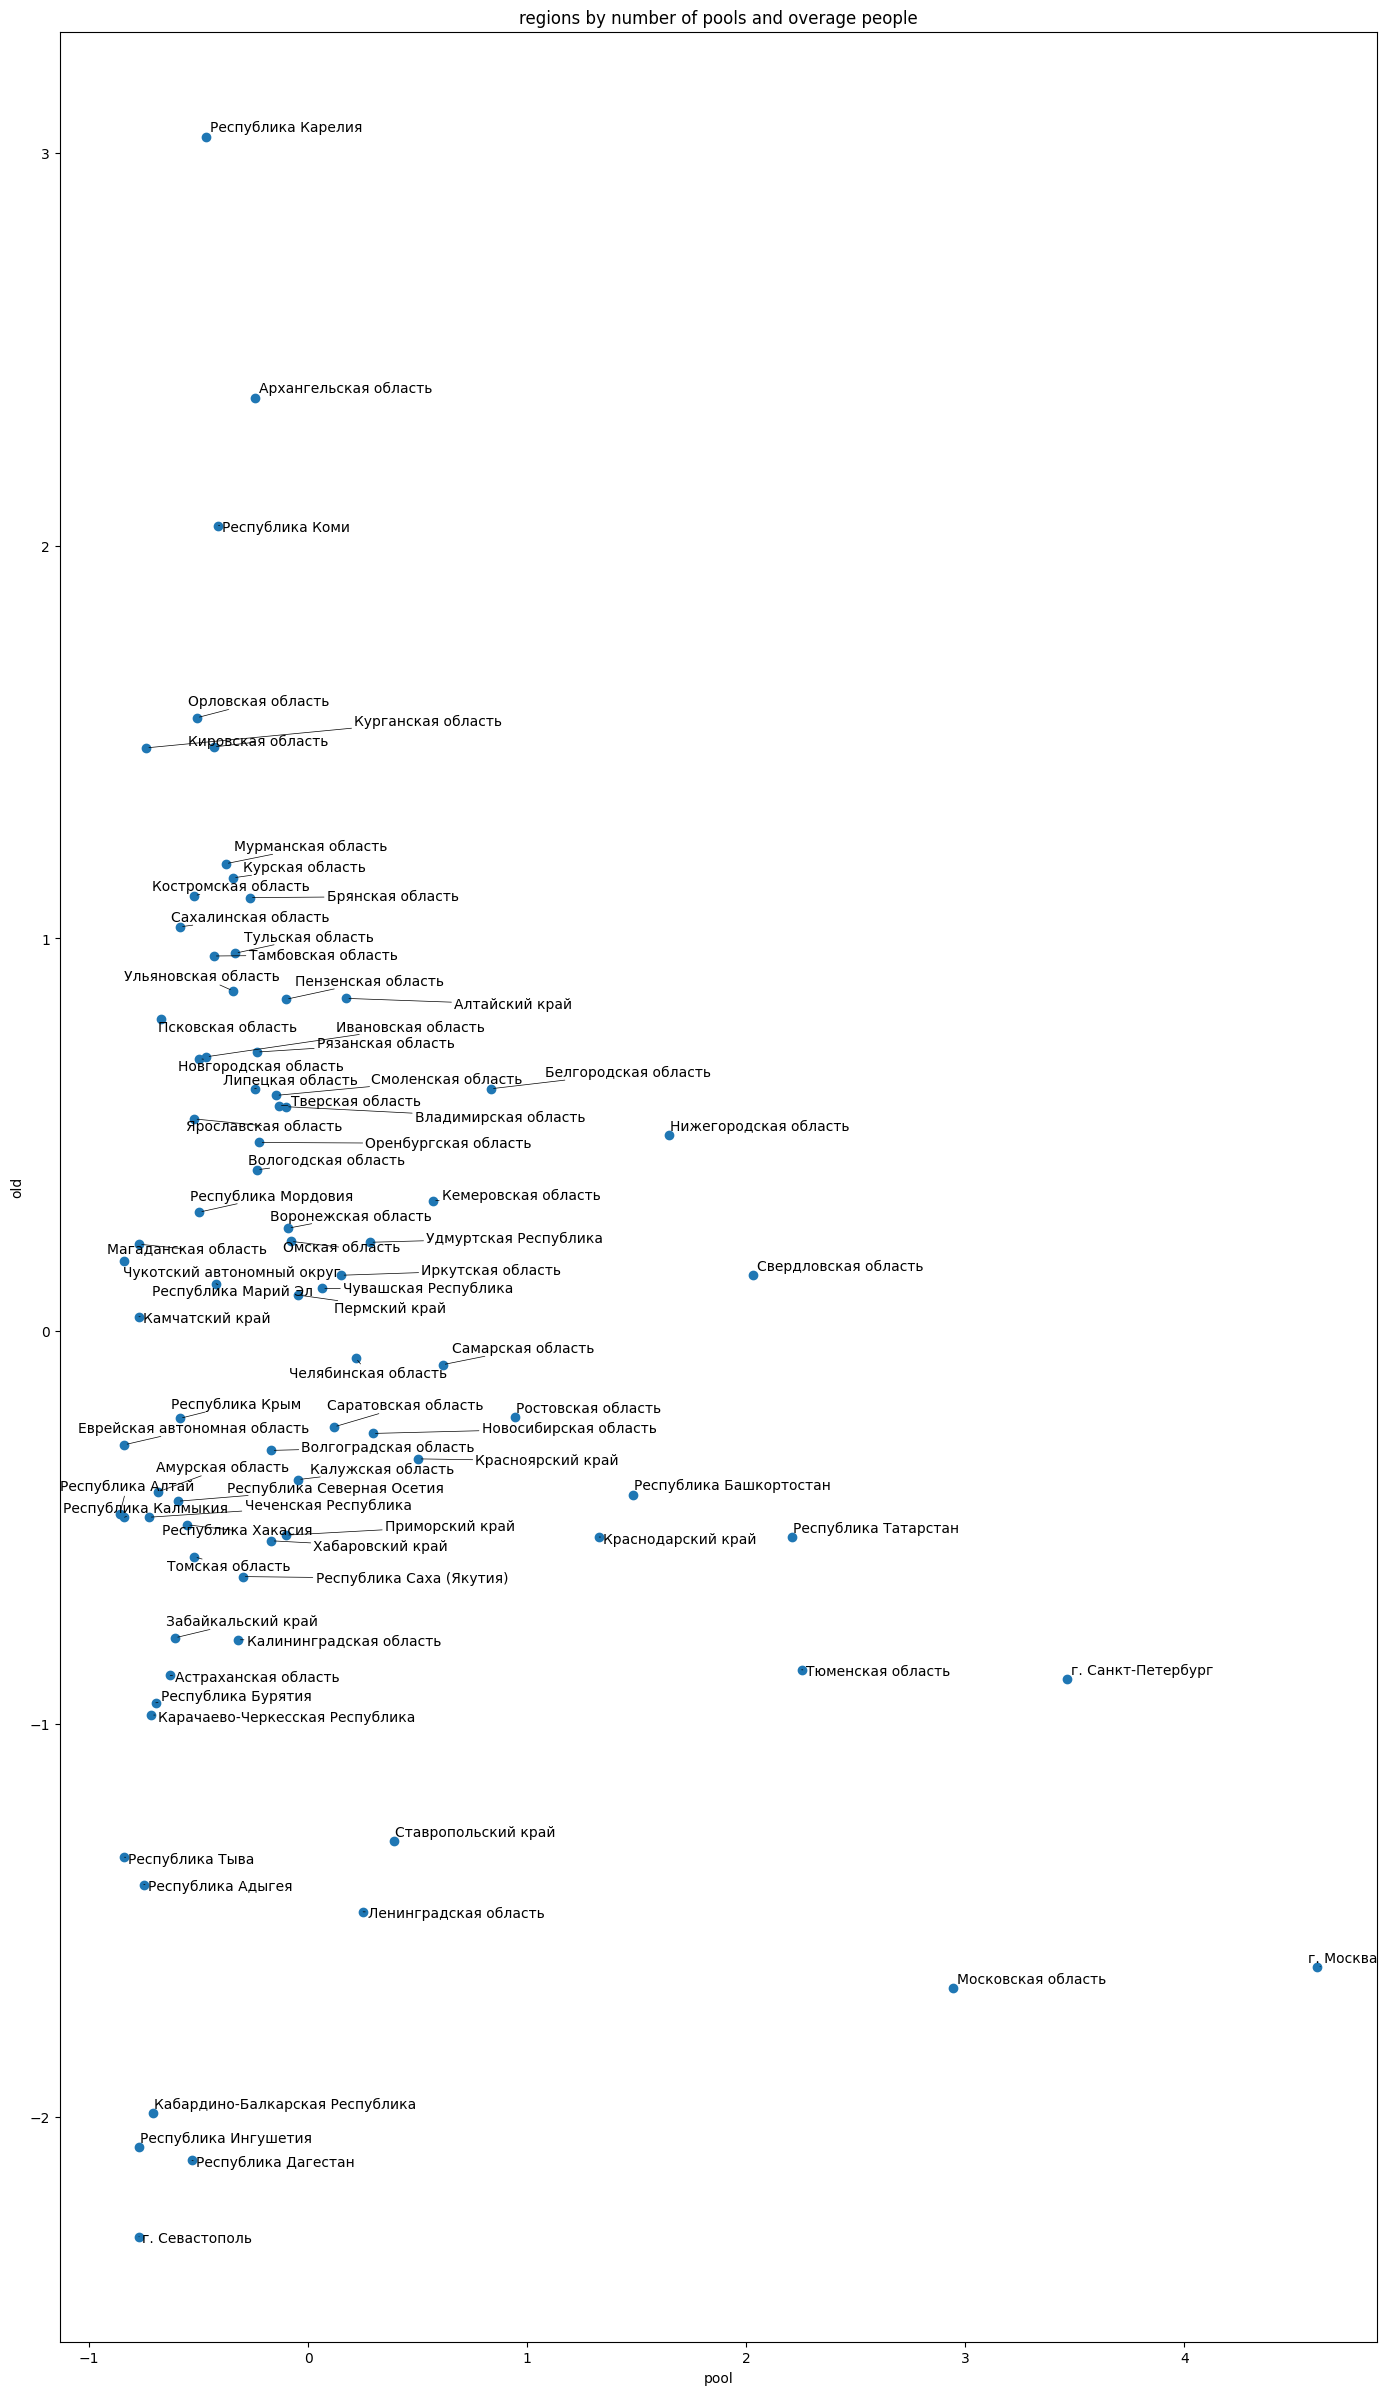

In [4]:
plt.figure(figsize=(17, 30))
plt.scatter(scaled_data['pools'], scaled_data['old'])
texts = []
for i, txt in enumerate(scaled_data.index):
   texts.append(plt.annotate(txt, (scaled_data['pools'][i], scaled_data['old'][i])))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5)) 
plt.xlabel('pool')
plt.ylabel('old')
plt.title('regions by number of pools and overage people')
plt.show()

In [5]:
data.corr()

,pools,old
pools,1.000000,-0.208678
old,-0.208678,1.000000


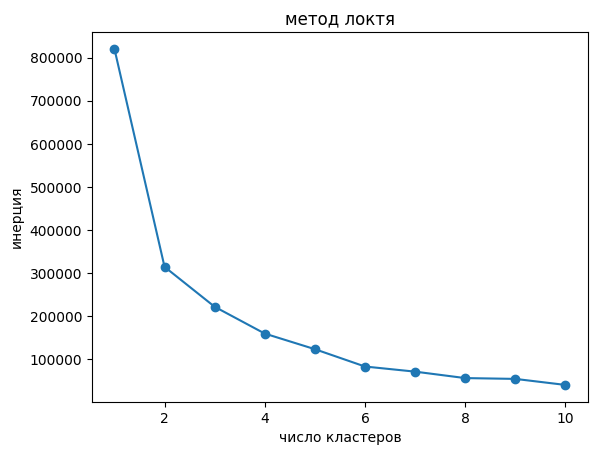

In [6]:
inert = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inert.append(kmeans.inertia_)

plt.plot(range(1, 11), inert, marker='o')
plt.title('метод локтя')
plt.xlabel('число кластеров')
plt.ylabel('инерция')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.labels_

In [16]:
sil = silhouette_score(scaled_data, labels)
db = davies_bouldin_score(scaled_data, labels)
data['cluster'] = labels
data.head()

,pools,old,cluster
region,,,
Белгородская область,156,325.2,0
Брянская область,56,345.5,0
Владимирская область,71,323.3,0
Воронежская область,72,310.4,0
Ивановская область,38,328.6,0


/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_22006/2487915635.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.annotate(txt, (scaled_data['pools'][i], scaled_data['old'][i])))


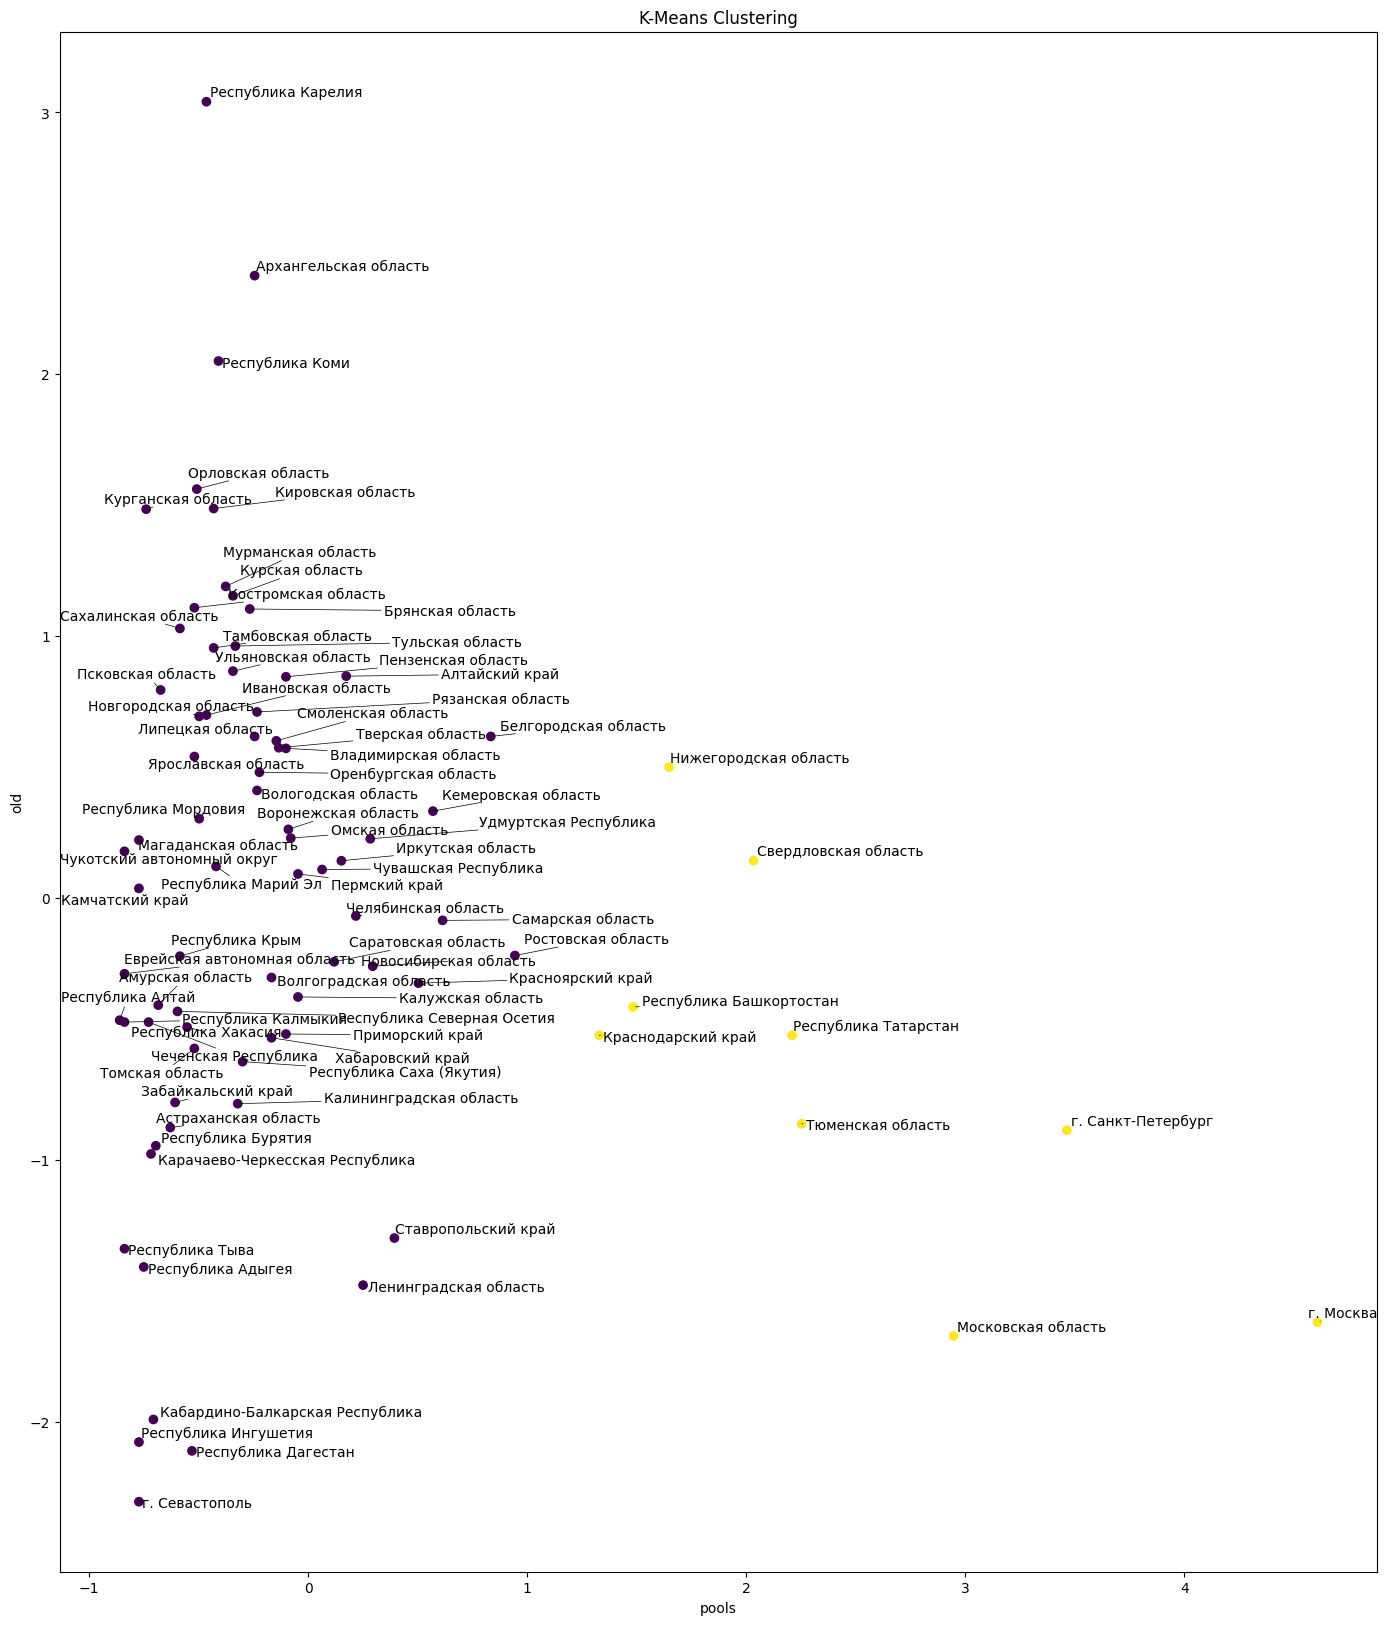

In [17]:
plt.figure(figsize=(17, 20))
plt.scatter(scaled_data['pools'], scaled_data['old'], c=labels, cmap='viridis')
texts = []

for i, txt in enumerate(scaled_data.index):
    texts.append(plt.annotate(txt, (scaled_data['pools'][i], scaled_data['old'][i])))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
plt.xlabel('pools')
plt.ylabel('old')
plt.title('K-Means Clustering')
plt.show()

In [18]:
print(f"Silhouette Coefficient: {sil}")
print(f"Davies-Bouldin Index: {db}")

Silhouette Coefficient: 0.5528703372769033
Davies-Bouldin Index: 0.697378704940191


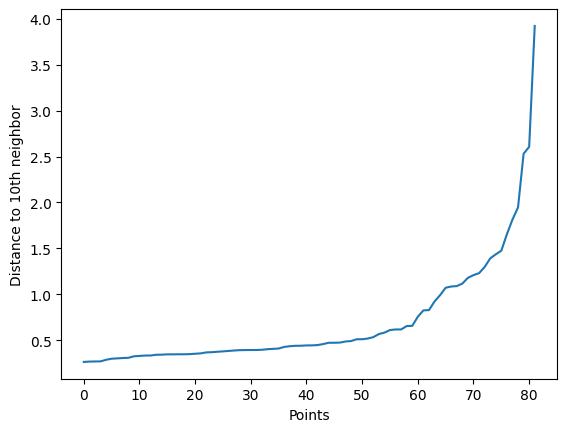

In [19]:
from sklearn.neighbors import NearestNeighbors

X = scaled_data 
knn = NearestNeighbors(n_neighbors=10) 
knn.fit(X)
distances, indices = knn.kneighbors(X)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 10th neighbor')
plt.show()

In [38]:
dbscan = DBSCAN(eps=1, min_samples=2)
dbscan.fit(scaled_data)
labels = dbscan.labels_
data['cluster'] = labels

/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_22006/2383984914.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.annotate(txt, (scaled_data['pools'][i], scaled_data['old'][i])))


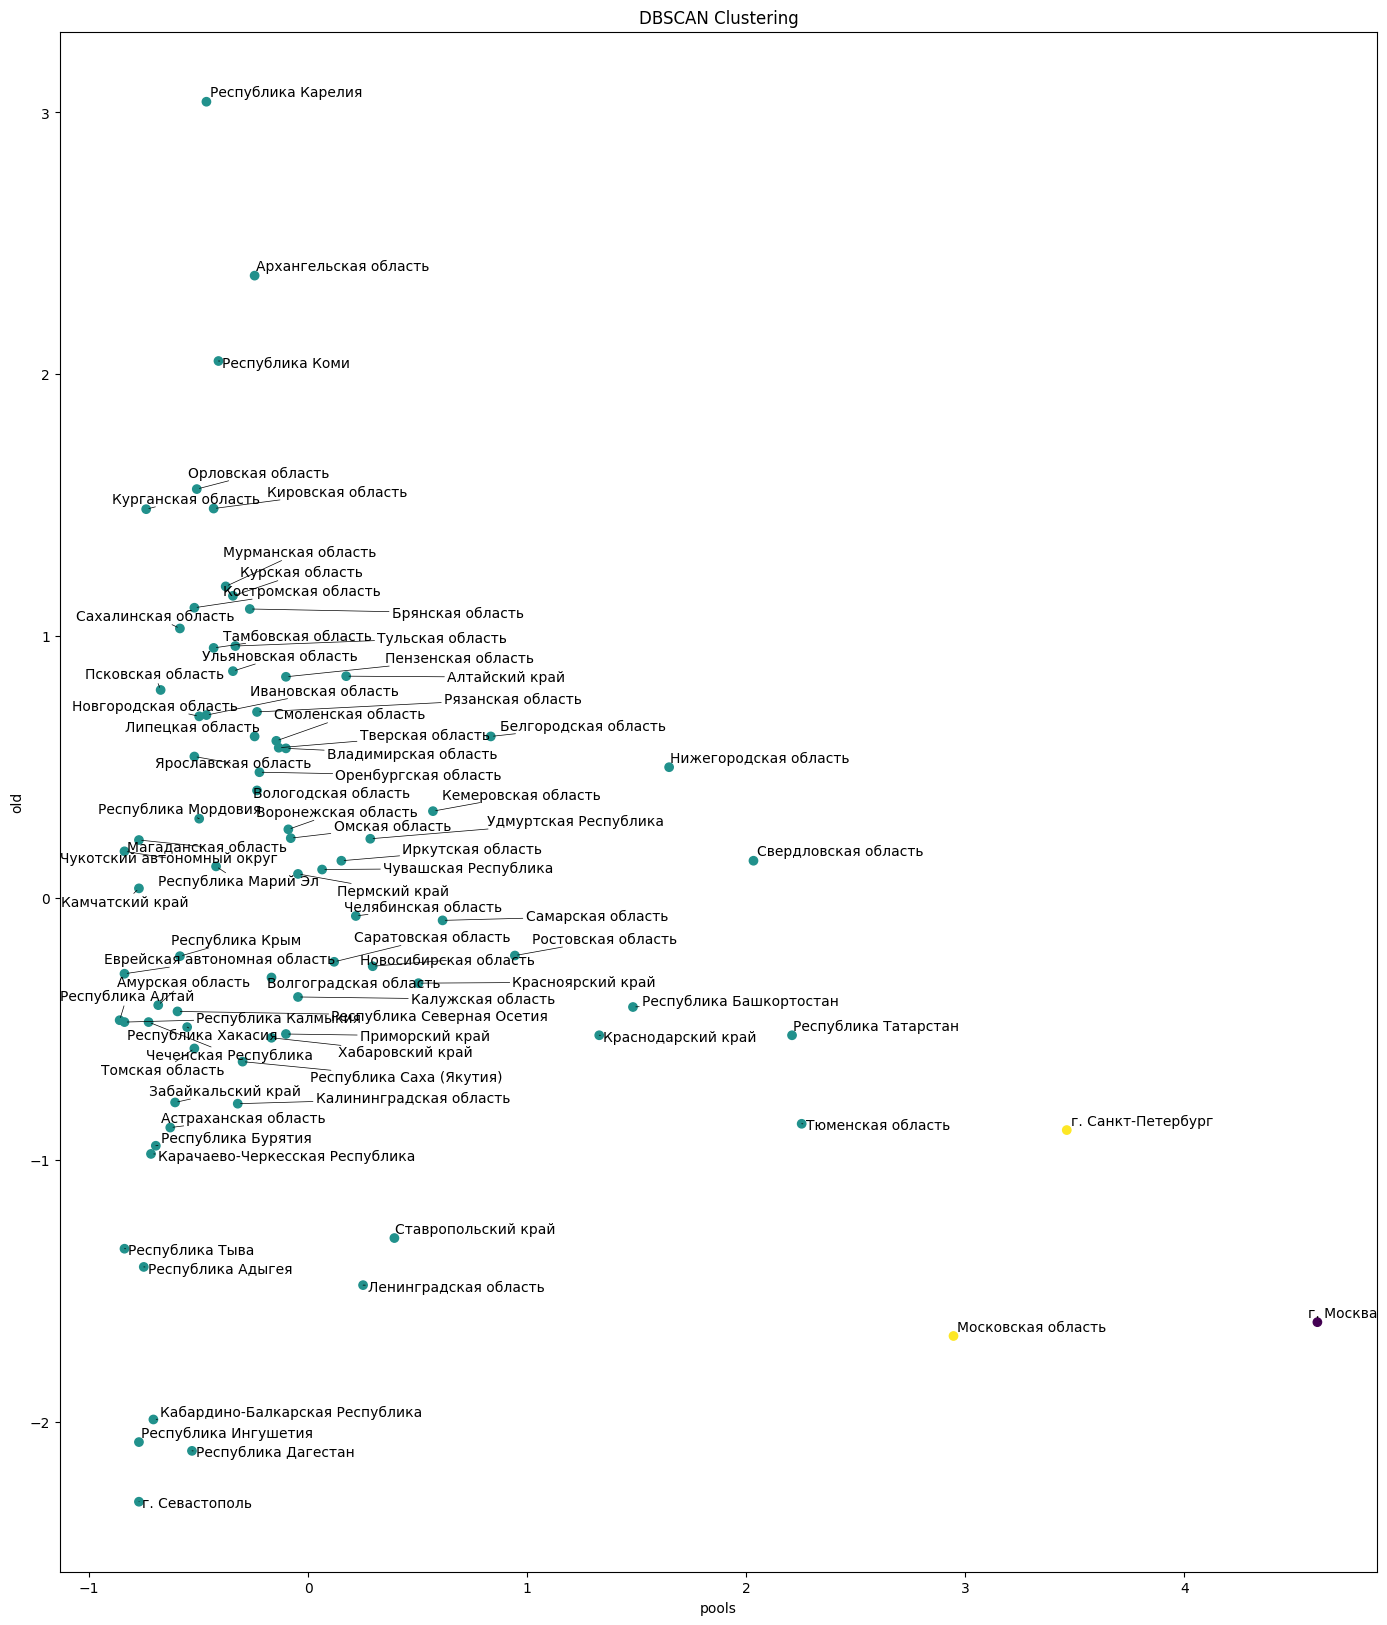


Шумовые точки:
           pools    old  cluster
region                          
г. Москва    499  231.9       -1

Silhouette Coefficient: 0.5656473293895975
Davies-Bouldin Index: 0.38420919188040265


In [39]:
plt.figure(figsize=(17, 20))
plt.scatter(scaled_data['pools'], scaled_data['old'], c=labels, cmap='viridis')
texts = []

for i, txt in enumerate(scaled_data.index):
    texts.append(plt.annotate(txt, (scaled_data['pools'][i], scaled_data['old'][i])))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
plt.xlabel('pools')
plt.ylabel('old')
plt.title('DBSCAN Clustering')
plt.show()

noise = data[data['cluster'] == -1]
print("\nШумовые точки:")
print(noise)
print('')
try:
    silhouette_avg = silhouette_score(scaled_data, labels)
    print(f"Silhouette Coefficient: {silhouette_avg}")
except ValueError:
    print("Silhouette Coefficient is undefined for DBSCAN with this configuration.")

db_index = davies_bouldin_score(scaled_data, labels)
print(f"Davies-Bouldin Index: {db_index}")